In [1]:
#Importing all the libraries
import os
import datetime
import pandas as pd 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Warnings
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
train_file = pd.read_csv(r"C:\Users\KAAMII\Downloads\Consumer Complaint Dispution\Data\Consumer_Complaints_train.csv")
test_file = pd.read_csv(r"C:\Users\KAAMII\Downloads\Consumer Complaint Dispution\Data\Consumer_Complaints_test_share.csv")

print(train_file.shape)
print(test_file.shape)

(478421, 18)
(119606, 17)


In [3]:
train_file.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [4]:
test_file.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2014-01-18,Bank account or service,Cashing a check without an account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,CA,95691,NaN,NaN,Web,2014-01-17,Closed with explanation,Yes,675956
1,2016-03-31,Debt collection,Credit card,Cont'd attempts collect debt not owed,Debt was paid,NaN,NaN,"National Credit Adjusters, LLC",FL,32086,NaN,Consent not provided,Web,2016-03-31,Closed with explanation,Yes,1858795
2,2012-03-08,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,94618,NaN,NaN,Web,2012-03-09,Closed without relief,Yes,32637
3,2016-01-07,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,Company chooses not to provide a public response,"TransUnion Intermediate Holdings, Inc.",FL,33584,Older American,NaN,Postal mail,2016-01-12,Closed with non-monetary relief,Yes,1731374
4,2013-08-23,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,FL,33543,NaN,NaN,Web,2013-08-23,Closed with explanation,Yes,501487


In [5]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478421 entries, 0 to 478420
Data columns (total 18 columns):
Date received                   478421 non-null object
Product                         478421 non-null object
Sub-product                     339948 non-null object
Issue                           478421 non-null object
Sub-issue                       185796 non-null object
Consumer complaint narrative    75094 non-null object
Company public response         90392 non-null object
Company                         478421 non-null object
State                           474582 non-null object
ZIP code                        474573 non-null object
Tags                            67206 non-null object
Consumer consent provided?      135487 non-null object
Submitted via                   478421 non-null object
Date sent to company            478421 non-null object
Company response to consumer    478421 non-null object
Timely response?                478421 non-null object
Consumer dis

Equalizing the columns of train and test file and combining both files into one for Data Preprocessing 

In [6]:
train_file['data'] = 'train'
test_file['data'] = 'test'
test_file['Consumer disputed?'] = np.nan

file = pd.concat([train_file, test_file], axis=0)
file.shape

(598027, 19)

# Dealing with Missing Values

In [7]:
train_file.isnull().sum()

Date received                        0
Product                              0
Sub-product                     138473
Issue                                0
Sub-issue                       292625
Consumer complaint narrative    403327
Company public response         388029
Company                              0
State                             3839
ZIP code                          3848
Tags                            411215
Consumer consent provided?      342934
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
data                                 0
dtype: int64

In [8]:
file.isnull().sum()

Company                              0
Company public response         484859
Company response to consumer         0
Complaint ID                         0
Consumer complaint narrative    504376
Consumer consent provided?      428676
Consumer disputed?              119606
Date received                        0
Date sent to company                 0
Issue                                0
Product                              0
State                             4764
Sub-issue                       365685
Sub-product                     173225
Submitted via                        1
Tags                            513950
Timely response?                     0
ZIP code                          4774
data                                 0
dtype: int64

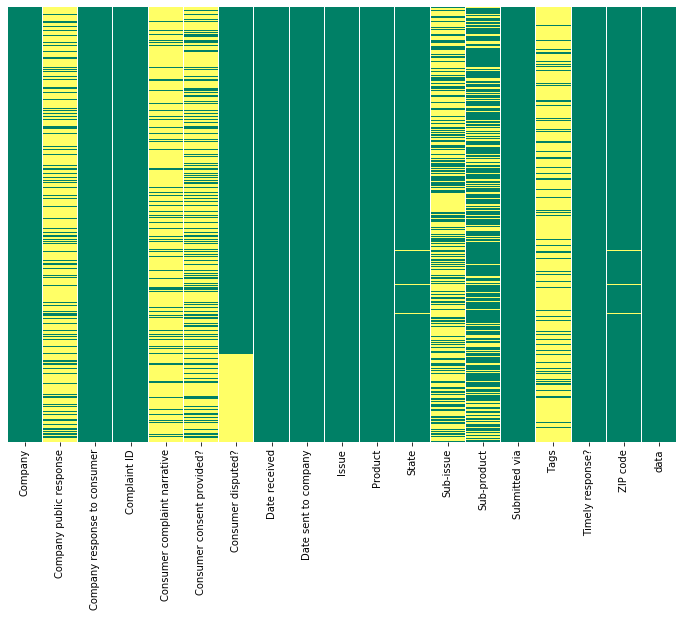

In [9]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(file.isna(),
           cbar = False,
           yticklabels = False,
           cmap = 'summer')
plt.show()

Dropping unwanted columns or columns with large number of missing values.
Here I have dropped the Consumer complaint narrative column as well,  because we have Issue and Sub Issue which can give us quite good information that people facing which issue are disputing with the company

In [10]:
train_file.drop(columns=['Complaint ID', 'Consumer complaint narrative', 'Sub-issue', 'ZIP code'], inplace=True)
file.drop(columns=['Complaint ID', 'Consumer complaint narrative', 'Sub-issue', 'ZIP code'], inplace=True)

In [11]:
#Function to replace missing values

def fill_missing(df):

    #fill 'sub-product' with 'No sub-product'
    df['Sub-product'].fillna('No Sub-product', inplace=True)

    #fill 'State' with 'Unknown'
    df['State'].fillna('Unknown', inplace=True)

    # Combine "company public missing value" with "Company chose not to provide"
    df['Company public response'].fillna('Company chooses not to provide',inplace=True)

    #Combine missing value of "Issue" with "Other"
    df['Issue'].fillna('Other',inplace=True)

    # Replace missing vlaues of 'Tags' with 'Unknown'
    df['Tags'].fillna('Unknown',inplace=True)

    # Replace missing vlaues of 'Submitted via' with "'other'
    df['Submitted via'].fillna('Other',inplace=True)

    #Combine missing value,other,and withdrawn of "Consumer consent provided?" column
    #with Consumer consent not provided, since only users's complaints narrative will be provided
    #with the type of "Consumer consent provided"

    df['Consumer consent provided?'].fillna('Consent not provided',inplace=True)

    

In [12]:
fill_missing(train_file)
fill_missing(file)

In [13]:
#Replacing NaNs of other columns with forwardfill method
file.fillna(method='ffill', inplace=True)
train_file.fillna(method='ffill', inplace=True)

In [14]:
train_file.isnull().sum()

Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Company public response         0
Company                         0
State                           0
Tags                            0
Consumer consent provided?      0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
data                            0
dtype: int64

In [15]:
file.isnull().sum()

Company                         0
Company public response         0
Company response to consumer    0
Consumer consent provided?      0
Consumer disputed?              0
Date received                   0
Date sent to company            0
Issue                           0
Product                         0
State                           0
Sub-product                     0
Submitted via                   0
Tags                            0
Timely response?                0
data                            0
dtype: int64

In [16]:
train_file.nunique()

Date received                   1759
Product                           12
Sub-product                       48
Issue                             95
Company public response           11
Company                         3276
State                             63
Tags                               4
Consumer consent provided?         4
Submitted via                      6
Date sent to company            1706
Company response to consumer       7
Timely response?                   2
Consumer disputed?                 2
data                               1
dtype: int64

Replacing "Yes/No" values with 1/0

In [17]:
replace = {'Yes' : 1, 'No' : 0}

file['Timely response?'] = file['Timely response?'].apply(lambda x: replace[x])
file['Consumer disputed?'] = file['Consumer disputed?'].apply(lambda x: replace[x])

train_file['Timely response?'] = train_file['Timely response?'].apply(lambda x: replace[x])
train_file['Consumer disputed?'] = train_file['Consumer disputed?'].apply(lambda x: replace[x])

In [18]:
#Target Variable
train_file['Consumer disputed?'].value_counts()

0    376990
1    101431
Name: Consumer disputed?, dtype: int64

# Exploratory Data Analysis


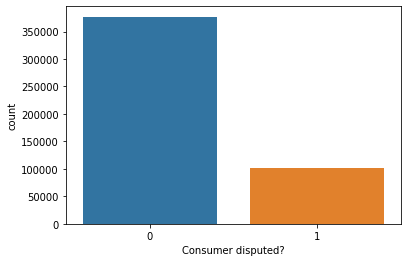

In [19]:
sns.countplot(train_file['Consumer disputed?'])

Maybe it is an Imbalance dataset problem

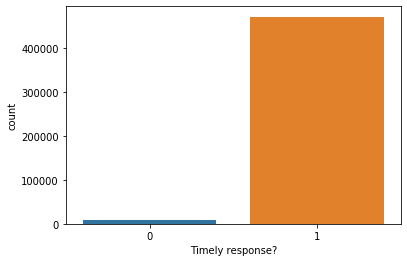

In [20]:
sns.countplot(train_file['Timely response?'])

Almost every companies gives Timely Response to the Consumer

Checking which Product has the maximum complaints

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

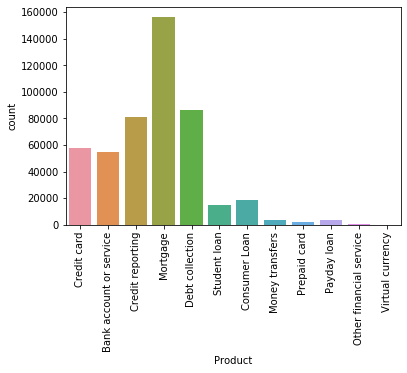

In [21]:
sns.countplot(train_file['Product'])
plt.xticks(rotation=90)

Product **Mortgage** has the maximum complaints followed by Debt collection and Credict reporting, 
Checking what are the issues regarding these products

1. Issues related to Mortgage

In [22]:
set(train_file['Issue'][train_file['Product'] == 'Mortgage'])

{'Application, originator, mortgage broker',
 'Credit decision / Underwriting',
 'Loan modification,collection,foreclosure',
 'Loan servicing, payments, escrow account',
 'Other',
 'Settlement process and costs'}

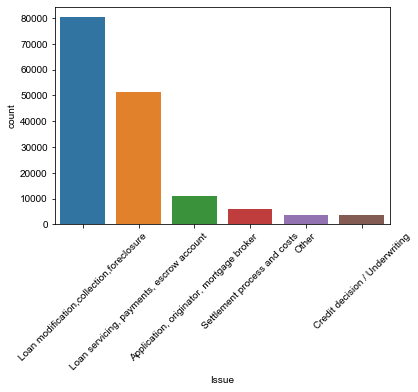

In [23]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Mortgage'])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15.7,8.27)})

**Loan modification, collection, foreclosure** is the major issue of the product Mortgage

Checking the same for other products

2. Issues related to Debt collection

In [24]:
set(train_file['Issue'][train_file['Product'] == 'Debt collection'])

{'Communication tactics',
 "Cont'd attempts collect debt not owed",
 'Disclosure verification of debt',
 'False statements or representation',
 'Improper contact or sharing of info',
 'Taking/threatening an illegal action'}

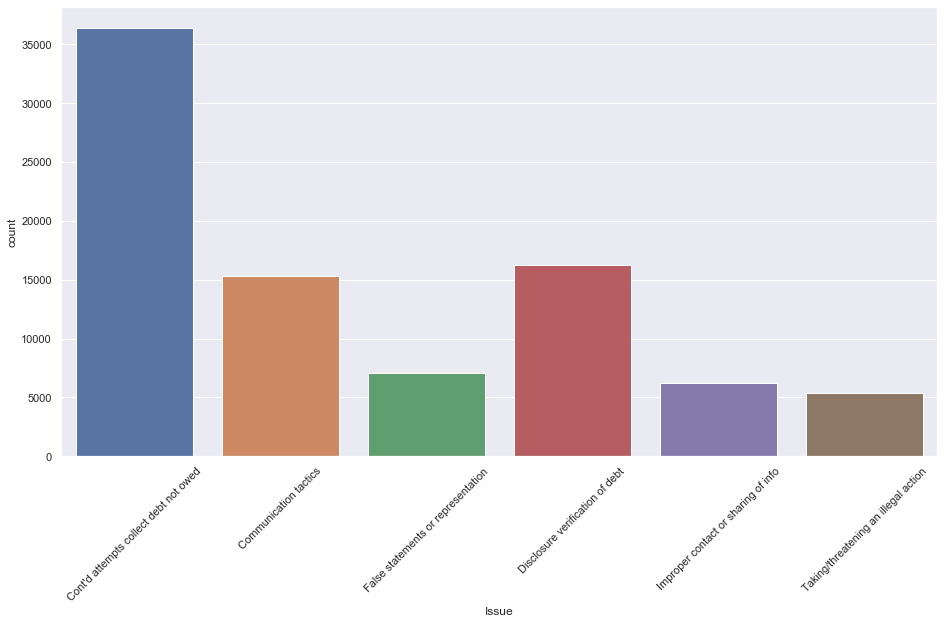

In [25]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Debt collection'])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15.7,8.27)})

3. Issues related to Credit reporting

In [26]:
set(train_file['Issue'][train_file['Product'] == 'Credit reporting'])

{'Credit monitoring or identity protection',
 "Credit reporting company's investigation",
 'Improper use of my credit report',
 'Incorrect information on credit report',
 'Unable to get credit report/credit score'}

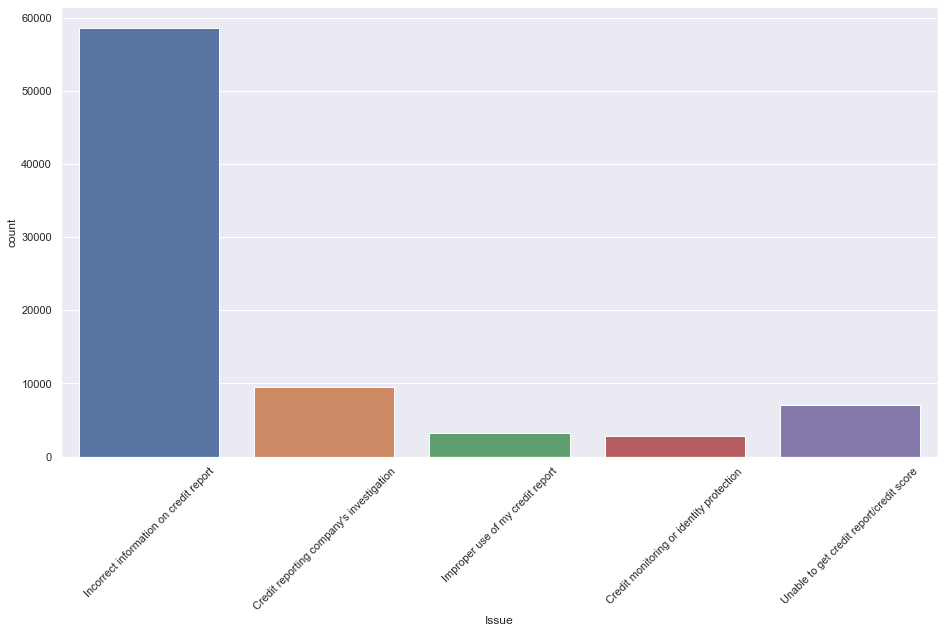

In [27]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Credit reporting'])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15.7,8.27)})

4. Issues related to credit card

In [28]:
set(train_file['Issue'][train_file['Product'] == 'Credit card'])

{'APR or interest rate',
 'Advertising and marketing',
 'Application processing delay',
 'Arbitration',
 'Balance transfer',
 'Balance transfer fee',
 'Bankruptcy',
 'Billing disputes',
 'Billing statement',
 'Cash advance',
 'Cash advance fee',
 'Closing/Cancelling account',
 'Collection debt dispute',
 'Collection practices',
 'Convenience checks',
 'Credit card protection / Debt protection',
 'Credit determination',
 'Credit line increase/decrease',
 'Credit reporting',
 'Customer service / Customer relations',
 'Delinquent account',
 'Forbearance / Workout plans',
 'Identity theft / Fraud / Embezzlement',
 'Late fee',
 'Other',
 'Other fee',
 'Overlimit fee',
 'Payoff process',
 'Privacy',
 'Rewards',
 'Sale of account',
 'Transaction issue',
 'Unsolicited issuance of credit card'}

There are many issues for these product

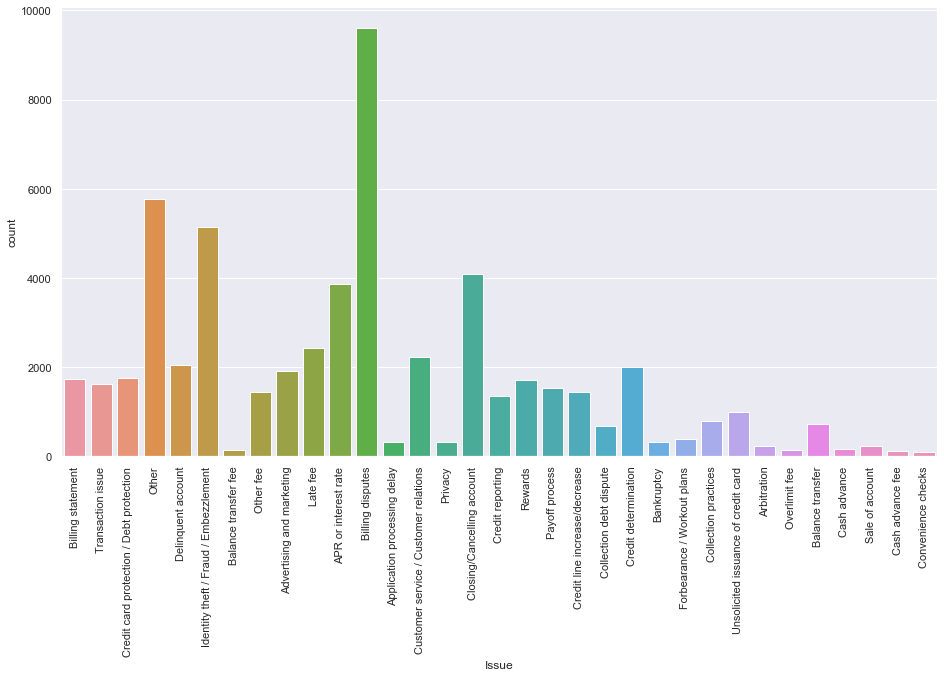

In [29]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Credit card'])
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20.7,8.27)})

5. Issues related to Bank account or service

In [30]:
set(train_file['Issue'][train_file['Product'] == 'Bank account or service'])

{'Account opening, closing, or management',
 'Deposits and withdrawals',
 'Making/receiving payments, sending money',
 'Problems caused by my funds being low',
 'Using a debit or ATM card'}

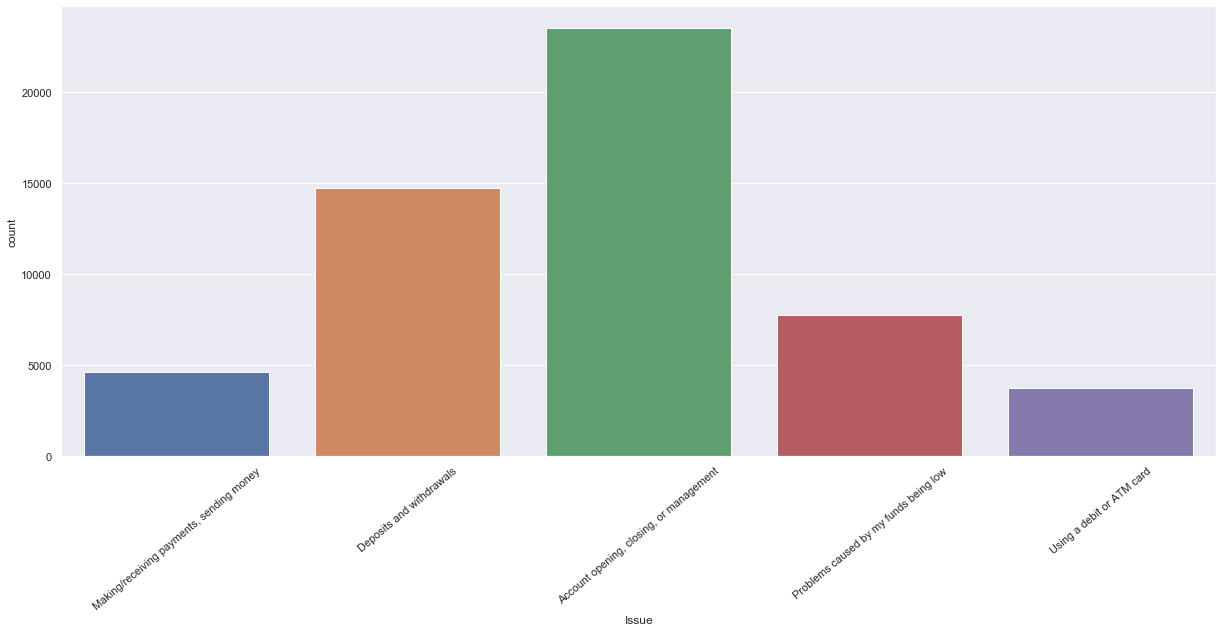

In [31]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Bank account or service'])
plt.xticks(rotation=40)
sns.set(rc={'figure.figsize':(12.7,8.27)})

6. Issues related to Consumer Loan

In [32]:
set(train_file['Issue'][train_file['Product'] == 'Consumer Loan'])

{'Account terms and changes',
 'Applied for loan/did not receive money',
 "Can't contact lender",
 "Can't stop charges to bank account",
 'Charged bank acct wrong day or amt',
 "Charged fees or interest I didn't expect",
 'Lender damaged or destroyed property',
 'Lender damaged or destroyed vehicle',
 'Lender repossessed or sold the vehicle',
 'Lender sold the property',
 'Managing the line of credit',
 'Managing the loan or lease',
 'Payment to acct not credited',
 'Problems when you are unable to pay',
 "Received a loan I didn't apply for",
 'Shopping for a line of credit',
 'Shopping for a loan or lease',
 'Taking out the loan or lease'}

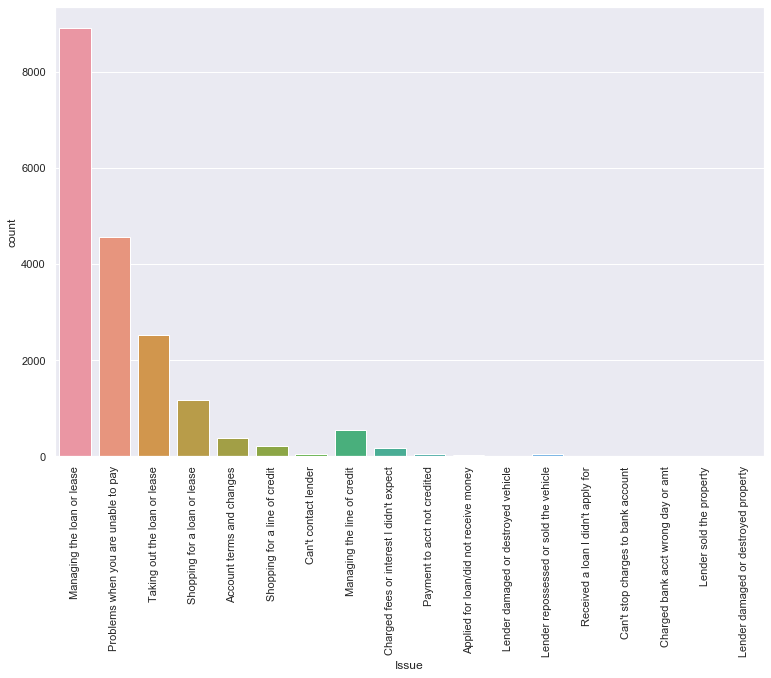

In [33]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Consumer Loan'])
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(20.7,8.27)})

7. Issues related to Student loan

In [34]:
set(train_file['Issue'][train_file['Product'] == 'Student loan'])

{"Can't repay my loan",
 'Dealing with my lender or servicer',
 'Getting a loan',
 'Problems when you are unable to pay',
 'Repaying your loan'}

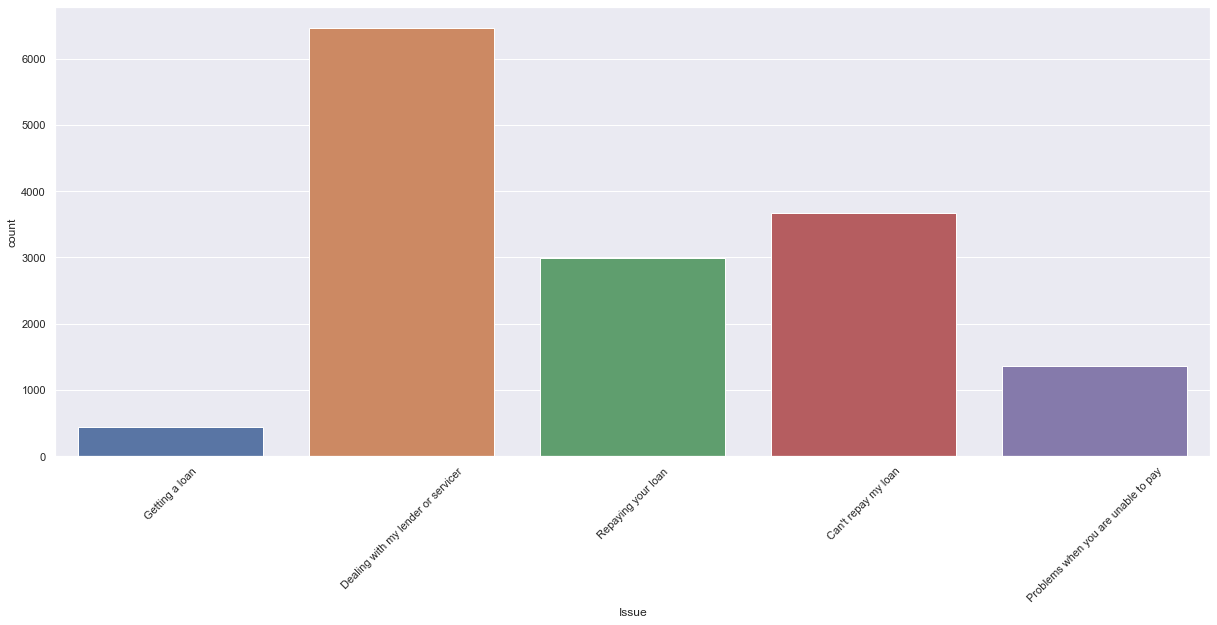

In [35]:
sns.countplot(train_file['Issue'][train_file['Product'] == 'Student loan'])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(12.7,8.27)})

I thought to make new features from Issue column by selecting the top 2 major issues for every product and making dummies, I had not implemented this because i don't know it will work or not so please help me with this

Checking for Top 10 companies having maximum complaints of consumers

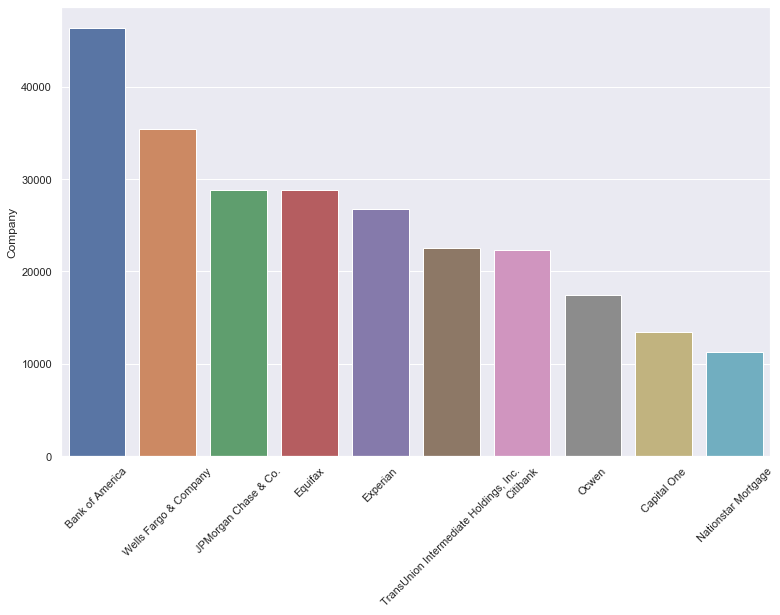

In [36]:
sns.barplot(x=train_file['Company'].value_counts().index[:10], y=train_file['Company'].value_counts()[:10])
plt.xticks(rotation=45)
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [37]:
train_file['Company'].value_counts()[:10]

Bank of America                           46336
Wells Fargo & Company                     35453
JPMorgan Chase & Co.                      28852
Equifax                                   28832
Experian                                  26794
TransUnion Intermediate Holdings, Inc.    22508
Citibank                                  22300
Ocwen                                     17475
Capital One                               13396
Nationstar Mortgage                       11278
Name: Company, dtype: int64

Maybe we can consider only these companies as Top 10 worst companies and make dummies

In [38]:
file['Bank of America'] = (file['Company'] == 'Bank of America').astype(int)
file['Wells Fargo & Company'] = (file['Company'] == 'Bank of America').astype(int)
file['JPMorgan Chase & Co.'] = (file['Company'] == 'JPMorgan Chase & Co.').astype(int)
file['Equifax'] = (file['Company'] == 'Equifax').astype(int)
file['Experian'] = (file['Company'] == 'Experian').astype(int)
file['TransUnion Intermediate Holdings, Inc.'] = (file['Company'] == 'TransUnion Intermediate Holdings, Inc.').astype(int)
file['Citibank'] = (file['Company'] == 'Citibank').astype(int)
file['Ocwen'] = (file['Company'] == 'Ocwen').astype(int)
file['Capital One'] = (file['Company'] == 'Capital One').astype(int)
file['Nationstar Mortgage'] = (file['Company'] == 'Nationstar Mortgage').astype(int)

In [39]:
file.columns

Index(['Company', 'Company public response', 'Company response to consumer',
       'Consumer consent provided?', 'Consumer disputed?', 'Date received',
       'Date sent to company', 'Issue', 'Product', 'State', 'Sub-product',
       'Submitted via', 'Tags', 'Timely response?', 'data', 'Bank of America',
       'Wells Fargo & Company', 'JPMorgan Chase & Co.', 'Equifax', 'Experian',
       'TransUnion Intermediate Holdings, Inc.', 'Citibank', 'Ocwen',
       'Capital One', 'Nationstar Mortgage'],
      dtype='object')

Checking complaint submission methods

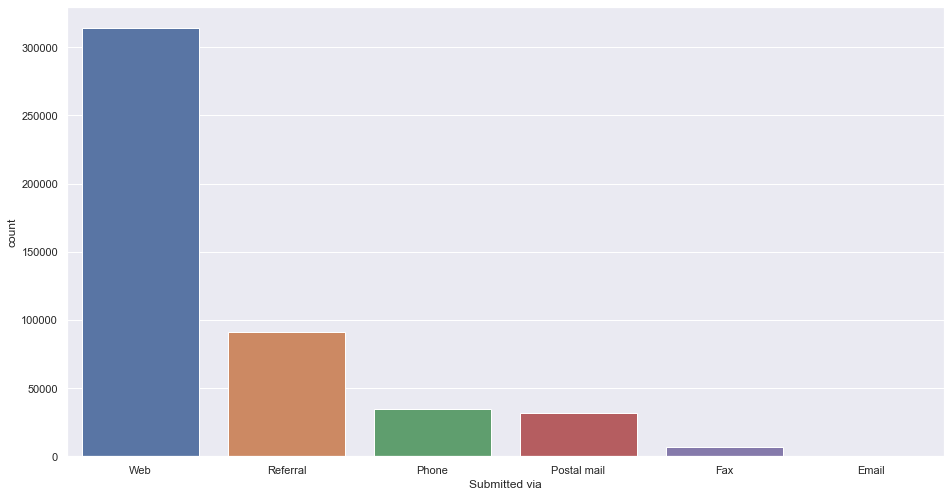

In [40]:
sns.countplot(train_file['Submitted via'])

Most of the complaints are submitted via Web

# Feature Encoding 

I have done Feature Encoding on the combined file having train and test data

In [41]:
train_file['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed',
       'Closed with non-monetary relief', 'Closed with monetary relief',
       'Closed with relief', 'Closed without relief', 'Untimely response'],
      dtype=object)

In [42]:
pd.crosstab(train_file['Company response to consumer'], train_file['Consumer disputed?'], normalize='index').round(2)

Consumer disputed?,0,1
Company response to consumer,,
Closed,0.78,0.22
Closed with explanation,0.77,0.23
Closed with monetary relief,0.89,0.11
Closed with non-monetary relief,0.87,0.13
Closed with relief,0.87,0.13
Closed without relief,0.73,0.27
Untimely response,0.00,1.00


In [43]:
replace = {'Closed':'0', 'Untimely response':'0','Closed without relief':'0', 
    'Closed with explanation':'1', 'Closed with non-monetary relief':'2',
    'Closed with relief': '2', 'Closed with monetary relief':'2'}

file['Company response to consumer'] = train_file['Company response to consumer'].apply(lambda x: replace[x])

In [44]:
pd.crosstab(train_file['Consumer consent provided?'], train_file['Consumer disputed?'])

Consumer disputed?,0,1
Consumer consent provided?,,
Consent not provided,317520,81561
Consent provided,56280,18815
Consent withdrawn,2,1
Other,3188,1054


In [45]:
replace = {'Consent not provided': 0, 'Consent withdrawn': 0, 'Other': 0, 'Consent provided': 1}
file['Consumer consent provided?'] = train_file['Consumer consent provided?'].apply(lambda x: replace[x])

In [46]:
file['Company public response'].unique()

array(['Company chooses not to provide',
       'Company chooses not to provide a public response',
       'Company has responded to the consumer and the CFPB and chooses not to provide a public response',
       'Company believes it acted appropriately as authorized by contract or law',
       'Company believes complaint caused principally by actions of third party outside the control or direction of the company',
       'Company believes the complaint is the result of a misunderstanding',
       'Company disputes the facts presented in the complaint',
       "Company can't verify or dispute the facts in the complaint",
       'Company believes complaint is the result of an isolated error',
       'Company believes complaint represents an opportunity for improvement to better serve consumers',
       'Company believes complaint relates to a discontinued policy or procedure'],
      dtype=object)

In [47]:
#Encoding Company public response column
#I have grouped some of the values

file['Company public response'] = file['Company public response'].map( {
    "Company chooses not to provide" : '0',
    "Company chooses not to provide a public response" : '0',
    "Company has responded to the consumer and the CFPB and chooses not to provide a pu" : '0',
    "Company has responded to the consumer and the CFPB and chooses not to provide a public response" : '0',
    "Company believes it acted appropriately as authorized by contract or law" : '1',
    "Company believes complaint caused principally by actions of third party outside the control or direction of the company" : '2',
    "Company believes the complaint is the result of a misunderstanding" : '3',
    "Company disputes the facts presented in the complaint" : '4',
    "Company believes complaint is the result of an isolated error" : '5',
    "Company can't verify or dispute the facts in the complaint" : '6',
    "Company believes complaint represents an opportunity for improvement to better serve consumers" : '7',
    "Company believes complaint relates to a discontinued policy or procedure" : '8'
} )

In [48]:
file['Company public response'].unique()

array(['0', '1', '2', '3', '4', '6', '5', '7', '8'], dtype=object)

In [ ]:
pd.crosstab(train_file['State'], train_file['Consumer disputed?'], normalize='index').round(2)

States can be grouped having same proportion of Consumer Disputes and then dummies can be created 

Making a new feature from company column by calulating the complaint counts of each company, if we do so maybe we can drop company column and the dummies we created for top 10 worst companies. 


In [50]:
company_complaints_counts = file['Company'].value_counts()
file['company_complaint_counts'] = file['Company'].apply(lambda x: company_complaints_counts[x])

Extracting useful information from Date columns

In [51]:
#First convert into Datetime type
file['Date received'] = pd.to_datetime(file['Date received'])
file['Date sent to company'] = pd.to_datetime(file['Date sent to company'])

In [52]:
file['Date_Sent_Day'] = file['Date sent to company'].apply(lambda x: x.day)
file['Date_Received_Day'] = file['Date received'].apply(lambda x: x.day)

In [53]:
#Time taken to process the complaint
file['ProcessTime'] = file['Date sent to company'].dt.day - file['Date received'].dt.day

In [54]:
file['Date_Sent_Month'] = file['Date sent to company'].apply(lambda x: x.month)
file['Date_Received_Month'] = file['Date received'].apply(lambda x: x.month)

In [55]:
file.drop(columns=['Date sent to company', 'Date received'], inplace=True)

In [56]:
file.head()

,Company,Company public response,Company response to consumer,Consumer consent provided?,Consumer disputed?,Issue,Product,State,Sub-product,Submitted via,...,Citibank,Ocwen,Capital One,Nationstar Mortgage,company_complaint_counts,Date_Sent_Day,Date_Received_Day,ProcessTime,Date_Sent_Month,Date_Received_Month
0,Wells Fargo & Company,0,1,0,0,Billing statement,Credit card,MI,No Sub-product,Web,...,0,0,0,0,44337,16,15,1,5,5
1,Santander Bank US,0,0,0,0,"Making/receiving payments, sending money",Bank account or service,PA,(CD) Certificate of deposit,Referral,...,0,0,0,0,2031,24,18,6,9,9
2,Equifax,0,2,0,0,Incorrect information on credit report,Credit reporting,CA,No Sub-product,Referral,...,0,0,0,0,36013,3,13,-10,4,3
3,U.S. Bancorp,0,2,1,0,Billing statement,Credit card,GA,No Sub-product,Web,...,0,0,0,0,10243,17,17,0,7,7
4,Bank of America,0,1,0,0,Transaction issue,Credit card,MA,No Sub-product,Web,...,0,0,0,0,57887,28,20,8,11,11


# Creating Dummies

In [57]:
cat_cols = ['Submitted via', 'Product', 'Tags', 'Company response to consumer', 'Company public response']

file = pd.get_dummies(file, columns=cat_cols)

In [58]:
#These columns have many categories so I am using for loop so that i can provide a cutoff
cat_cols = ['Sub-product', 'State', 'Issue']

In [59]:
for col in cat_cols:
    freqs=file[col].value_counts()
    k=freqs.index[freqs>1500][:-1]
    for cat in k:
        name=col+'_'+cat
        file[name]=(file[col]==cat).astype(int)
    del file[col]
    print(col)

Sub-product
State
Issue


In [60]:
file.drop(columns=['Company'], inplace=True)

In [61]:
file.head()

,Consumer consent provided?,Consumer disputed?,Timely response?,data,Bank of America,Wells Fargo & Company,JPMorgan Chase & Co.,Equifax,Experian,"TransUnion Intermediate Holdings, Inc.",...,Issue_Advertising and marketing,Issue_Fraud or scam,Issue_Credit card protection / Debt protection,Issue_Billing statement,Issue_Rewards,Issue_Transaction issue,Issue_Charged fees or interest I didn't expect,Issue_Payoff process,Issue_Credit line increase/decrease,Issue_Other fee
0,0,0,1,train,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,train,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,train,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,train,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [65]:
file.shape

(119605, 173)

In [64]:
file=file.sample(frac =0.2) 

# Training the model

In [66]:
train_data = file[file['data'] == 'train']
test_data = file[file['data'] == 'test']

train_data.drop(columns='data', axis=1, inplace=True)
test_data.drop(columns=['data', 'Consumer disputed?'], axis=1, inplace = True)

In [67]:
X = train_data.drop(columns=['Consumer disputed?'])
y = train_data['Consumer disputed?']

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.5,random_state=10)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':[0.01,0.1,1,10,100]}

In [71]:
from sklearn.model_selection import GridSearchCV
model=LogisticRegression(fit_intercept=True)
grid_search=GridSearchCV(model,param_grid=params,cv=3,scoring="roc_auc",verbose=4,n_jobs=-1)

In [72]:
Final=grid_search.fit(X,y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:   19.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   38.4s finished


In [73]:
Final.best_score_


0.6154875891093058

In [74]:
from lazypredict.Supervised import LazyClassifier

In [76]:
clf = LazyClassifier(verbose=4,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)


  0%|                                                                                           | 0/28 [00:00<?, ?it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.7890852064819655, 'Balanced Accuracy': 0.500099117851125, 'ROC AUC': 0.500099117851125, 'F1 Score': 0.6961025388098926, 'Time taken': 5.941359996795654}


  4%|██▉                                                                                | 1/28 [00:05<02:40,  5.94s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.7690956612650287, 'Balanced Accuracy': 0.5112871674343414, 'ROC AUC': 0.5112871674343414, 'F1 Score': 0.7069202495921302, 'Time taken': 9.576389789581299}


  7%|█████▉                                                                             | 2/28 [00:15<03:02,  7.03s/it]

{'Model': 'BernoulliNB', 'Accuracy': 0.7551489806586513, 'Balanced Accuracy': 0.517009353188675, 'ROC AUC': 0.5170093531886751, 'F1 Score': 0.708453782290005, 'Time taken': 0.6875121593475342}


 11%|████████▉                                                                          | 3/28 [00:16<02:08,  5.13s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.78893883951908, 'Balanced Accuracy': 0.5001879131149349, 'ROC AUC': 0.5001879131149349, 'F1 Score': 0.6962280454584303, 'Time taken': 73.10871267318726}


 14%|███████████▊                                                                       | 4/28 [01:29<10:12, 25.52s/it]

{'Model': 'CheckingClassifier', 'Accuracy': 0.7890433873497125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6960026475854362, 'Time taken': 0.518380880355835}


 18%|██████████████▊                                                                    | 5/28 [01:29<06:54, 18.02s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6789545216936749, 'Balanced Accuracy': 0.5211204023852751, 'ROC AUC': 0.5211204023852752, 'F1 Score': 0.6800014151328393, 'Time taken': 1.792656660079956}


 21%|█████████████████▊                                                                 | 6/28 [01:31<04:49, 13.15s/it]

{'Model': 'DummyClassifier', 'Accuracy': 0.6665551489806586, 'Balanced Accuracy': 0.4996836258318561, 'ROC AUC': 0.49968362583185605, 'F1 Score': 0.6667182745859896, 'Time taken': 0.5161566734313965}


 25%|████████████████████▊                                                              | 7/28 [01:32<03:16,  9.36s/it]

{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.6774699424986932, 'Balanced Accuracy': 0.5187999149628935, 'ROC AUC': 0.5187999149628933, 'F1 Score': 0.6784931527331692, 'Time taken': 0.7431178092956543}


 29%|███████████████████████▋                                                           | 8/28 [01:32<02:15,  6.78s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.7588290642969159, 'Balanced Accuracy': 0.5125152558910033, 'ROC AUC': 0.5125152558910033, 'F1 Score': 0.7062670350002731, 'Time taken': 2.3903348445892334}


 32%|██████████████████████████▋                                                        | 9/28 [01:35<01:43,  5.46s/it]

{'Model': 'GaussianNB', 'Accuracy': 0.33641400940930477, 'Balanced Accuracy': 0.5256897757719704, 'ROC AUC': 0.5256897757719703, 'F1 Score': 0.3270178536779463, 'Time taken': 0.8090927600860596}


 36%|█████████████████████████████▎                                                    | 10/28 [01:36<01:13,  4.07s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.7465133298484057, 'Balanced Accuracy': 0.5126627034130182, 'ROC AUC': 0.5126627034130182, 'F1 Score': 0.7036288238520729, 'Time taken': 503.5561385154724}


 46%|██████████████████████████████████████                                            | 13/28 [10:04<19:09, 76.61s/it]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.7890852064819655, 'Balanced Accuracy': 0.500099117851125, 'ROC AUC': 0.500099117851125, 'F1 Score': 0.6961025388098926, 'Time taken': 1.6585192680358887}


 50%|█████████████████████████████████████████                                         | 14/28 [10:06<12:37, 54.13s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.7868060637741767, 'Balanced Accuracy': 0.501632209870209, 'ROC AUC': 0.5016322098702091, 'F1 Score': 0.6981323050502396, 'Time taken': 37.948681354522705}


 54%|███████████████████████████████████████████▉                                      | 15/28 [10:43<10:40, 49.27s/it]

{'Model': 'LogisticRegression', 'Accuracy': 0.7890852064819655, 'Balanced Accuracy': 0.500099117851125, 'ROC AUC': 0.500099117851125, 'F1 Score': 0.6961025388098926, 'Time taken': 4.470500230789185}


 57%|██████████████████████████████████████████████▊                                   | 16/28 [10:48<07:10, 35.83s/it]

{'Model': 'NearestCentroid', 'Accuracy': 0.5578044955567172, 'Balanced Accuracy': 0.5739369539548307, 'ROC AUC': 0.5739369539548307, 'F1 Score': 0.5983995111241673, 'Time taken': 0.5898263454437256}


 64%|████████████████████████████████████████████████████▋                             | 18/28 [10:49<02:58, 17.80s/it]

{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6780554103502352, 'Balanced Accuracy': 0.5043568502254884, 'ROC AUC': 0.5043568502254885, 'F1 Score': 0.6739626011858227, 'Time taken': 0.7058494091033936}


 68%|███████████████████████████████████████████████████████▋                          | 19/28 [10:50<01:54, 12.68s/it]

{'Model': 'Perceptron', 'Accuracy': 0.6990904338734971, 'Balanced Accuracy': 0.5133292194802278, 'ROC AUC': 0.5133292194802279, 'F1 Score': 0.6870517522067282, 'Time taken': 0.6820855140686035}


 71%|██████████████████████████████████████████████████████████▌                       | 20/28 [10:50<01:12,  9.08s/it]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.5883742812336644, 'Balanced Accuracy': 0.4930955956372428, 'ROC AUC': 0.49309559563724276, 'F1 Score': 0.6181417093306736, 'Time taken': 1.3258452415466309}


 75%|█████████████████████████████████████████████████████████████▌                    | 21/28 [10:52<00:47,  6.75s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.7721902770517511, 'Balanced Accuracy': 0.5084916833987139, 'ROC AUC': 0.5084916833987139, 'F1 Score': 0.7049748377611512, 'Time taken': 1.7356712818145752}


 79%|████████████████████████████████████████████████████████████████▍                 | 22/28 [10:53<00:31,  5.25s/it]

{'Model': 'RidgeClassifier', 'Accuracy': 0.7890433873497125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6960026475854362, 'Time taken': 0.6272621154785156}


 82%|███████████████████████████████████████████████████████████████████▎              | 23/28 [10:54<00:19,  3.86s/it]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.7890433873497125, 'Balanced Accuracy': 0.5, 'ROC AUC': 0.5, 'F1 Score': 0.6960026475854362, 'Time taken': 1.213404655456543}


 86%|██████████████████████████████████████████████████████████████████████▎           | 24/28 [10:55<00:12,  3.07s/it]

{'Model': 'SGDClassifier', 'Accuracy': 0.7873915316257187, 'Balanced Accuracy': 0.500732394136535, 'ROC AUC': 0.500732394136535, 'F1 Score': 0.6970935346729061, 'Time taken': 2.39290189743042}


 89%|█████████████████████████████████████████████████████████████████████████▏        | 25/28 [10:58<00:08,  2.87s/it]

{'Model': 'SVC', 'Accuracy': 0.7885415577626764, 'Balanced Accuracy': 0.5002992539075537, 'ROC AUC': 0.5002992539075537, 'F1 Score': 0.6964249179695857, 'Time taken': 1729.434999704361}


 93%|███████████████████████████████████████████████████████████████████████████▏     | 26/28 [39:47<17:21, 520.84s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.7854678515420805, 'Balanced Accuracy': 0.5028538250402455, 'ROC AUC': 0.5028538250402455, 'F1 Score': 0.6995651884978025, 'Time taken': 5.86967396736145}


 96%|██████████████████████████████████████████████████████████████████████████████   | 27/28 [39:53<06:06, 366.35s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.788813382122321, 'Balanced Accuracy': 0.5003625762828696, 'ROC AUC': 0.5003625762828697, 'F1 Score': 0.6964419440111945, 'Time taken': 1.393829107284546}


100%|█████████████████████████████████████████████████████████████████████████████████| 28/28 [39:54<00:00, 256.86s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.56,0.57,0.57,0.60,0.59
GaussianNB,0.34,0.53,0.53,0.33,0.81
DecisionTreeClassifier,0.68,0.52,0.52,0.68,1.79
ExtraTreeClassifier,0.68,0.52,0.52,0.68,0.74
BernoulliNB,0.76,0.52,0.52,0.71,0.69
Perceptron,0.70,0.51,0.51,0.69,0.68
KNeighborsClassifier,0.75,0.51,0.51,0.70,503.56
ExtraTreesClassifier,0.76,0.51,0.51,0.71,2.39
BaggingClassifier,0.77,0.51,0.51,0.71,9.58


In [79]:
models




,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.56,0.57,0.57,0.60,0.59
GaussianNB,0.34,0.53,0.53,0.33,0.81
DecisionTreeClassifier,0.68,0.52,0.52,0.68,1.79
ExtraTreeClassifier,0.68,0.52,0.52,0.68,0.74
BernoulliNB,0.76,0.52,0.52,0.71,0.69
Perceptron,0.70,0.51,0.51,0.69,0.68
KNeighborsClassifier,0.75,0.51,0.51,0.70,503.56
ExtraTreesClassifier,0.76,0.51,0.51,0.71,2.39
BaggingClassifier,0.77,0.51,0.51,0.71,9.58
